<a href="https://colab.research.google.com/github/ritikdes/Text_Based_Emotion_Detection/blob/main/TBED_1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis for Text Based Emotion Detection #
This notebook contains a comprehensive analysis of the GoEmotions dataset. The goal is to understand the distribution of emotions, identify data quality issues, and prepare insights for the model training phase.

## 1. Environment Setup and Data Ingestion ##
In this section, we connect to the storage environment and load the raw dataset into a Pandas DataFrame.

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries and load data
import numpy as np
import pandas as pd

# Define the file path
file_path = '/content/drive/MyDrive/goemotions.csv'

# Load the dataset
goemotions1 = pd.read_csv(file_path)

# Display the first 5 rows to verify successful loading
goemotions1.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,True,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2,False,0,...,0,0,0,0,0,0,0,0,0,1


## 2. Data Schema and Feature Selection ##
In this phase, we examine the structure of the GoEmotions dataset and filter for the relevant features. The GoEmotions dataset is typically multi-label, meaning one text can have multiple associated emotions.

In [ ]:
# Check dataset dimensions
print(f"Dataset Shape: {goemotions1.shape}")
print(f"Total entries: {goemotions1.shape[0]}")
print(f"Total columns: {goemotions1.shape[1]}")

Dataset Shape: (211225, 37)
Total entries: 211225
Total columns: 37


### 2.1 Metadata Inspection ###
We are checking the datatypes of all the columns and their not-null count. We can see that most columns are integers, while the text is the primary input feature.

In [ ]:
# Detailed summary of columns and data types
goemotions1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211225 entries, 0 to 211224
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   text                  211225 non-null  object 
 1   id                    211225 non-null  object 
 2   author                211225 non-null  object 
 3   subreddit             211225 non-null  object 
 4   link_id               211225 non-null  object 
 5   parent_id             211225 non-null  object 
 6   created_utc           211225 non-null  float64
 7   rater_id              211225 non-null  int64  
 8   example_very_unclear  211225 non-null  bool   
 9   admiration            211225 non-null  int64  
 10  amusement             211225 non-null  int64  
 11  anger                 211225 non-null  int64  
 12  annoyance             211225 non-null  int64  
 13  approval              211225 non-null  int64  
 14  caring                211225 non-null  int64  
 15  

In [ ]:
goemotions1.columns

Index(['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
       'created_utc', 'rater_id', 'example_very_unclear', 'admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')

### 2.2 Feature Selection and Dimensionality Reduction ###
The raw dataset contains metadata such as author, subreddit, and timestamp which are irrelevant for natural language processing. We will filter the dataset to keep only the raw text and the emotion labels.

In [ ]:
# List of all the emotion columns
emotion_columns = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
    'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
    'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
    'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
    'relief', 'remorse', 'sadness', 'surprise', 'neutral'
]

# Create a streamlined DataFrame for analysis and training
columns_to_keep = ['text'] + emotion_columns
df = goemotions1[columns_to_keep].copy()

# Preview the cleaned data
df.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### 2.3 Initial Statistics on Emotions ###

In [ ]:
# Calculate the frequency of each emotion across the entire dataset
emotion_counts = df[emotion_columns].sum().sort_values(ascending=False)

# Display the top and bottom 5 emotions for a quick snapshot
print("Most Frequent Emotions:\n", emotion_counts.head())
print("\nLeast Frequent Emotions:\n", emotion_counts.tail())

Most Frequent Emotions:
 neutral       55298
approval      17620
admiration    17131
annoyance     13618
gratitude     11625
dtype: int64

Least Frequent Emotions:
 embarrassment    2476
nervousness      1810
pride            1302
relief           1289
grief             673
dtype: int64


## 3. Data Cleaning ##
Before visualizing the distributions, we must ensure the dataset is clean and understand the complexity of the multi-label structure.

### 3.1 Missing Value Analysis ###
We check for any null values in the text or label columns. Missing text would render a row useless, and missing labels would suggest incomplete data.

In [ ]:
# Check for missing values
missing_count = df.isnull().sum()
print(missing_count)

text              0
admiration        0
amusement         0
anger             0
annoyance         0
approval          0
caring            0
confusion         0
curiosity         0
desire            0
disappointment    0
disapproval       0
disgust           0
embarrassment     0
excitement        0
fear              0
gratitude         0
grief             0
joy               0
love              0
nervousness       0
optimism          0
pride             0
realization       0
relief            0
remorse           0
sadness           0
surprise          0
neutral           0
cleaned_text      0
dtype: int64


### 3.2 Duplicate Detection ###
Duplicate comments can skew the distribution of labels. We check for exact matches in the text column.

In [ ]:
# Count and remove duplicate entries
duplicate_count = df.duplicated(subset=['text']).sum()
print(f"Number of duplicate entries found: {duplicate_count}")

Number of duplicate entries found: 153493


**Duplicate Analysis:** We identified 153,493 duplicate text entries. In the GoEmotions dataset, this occurs because multiple human raters provided labels for the same Reddit comment. We must address this redundancy to prevent the model from over-leveraging frequent samples.

### 3.3 Multi-Label Consensus Aggregation
To provide a clear signal to our model and avoid bias, we will group the data by text and aggregate the labels.

In [ ]:
# Aggregate labels: If any rater assigned an emotion to a text, we count it as 1.
df_unique = df.groupby('text')[emotion_columns].max().reset_index() # .mean() only where most people agree

print(f"Original rows: {len(df)}")
print(f"Unique rows after aggregation: {len(df_unique)}")

Original rows: 211225
Unique rows after aggregation: 57732


### 3.4 Multi-label Complexity Analysis
In this section, we analyze the "Label Cardinality"—how many emotions are assigned to each unique comment. This helps us understand if the dataset consists of simple sentiments or complex, overlapping emotions.

In [ ]:
# Create label count for the unique dataset
df_unique['label_count'] = df_unique[emotion_columns].sum(axis=1)

print("Label Count Distribution:")
print(df_unique['label_count'].value_counts().sort_index())

Label Count Distribution:
label_count
0         2
1      8379
2     20098
3     12320
4      9045
5      5147
6      1953
7       604
8       130
9        36
10       10
11        4
12        2
13        2
Name: count, dtype: int64


### Insight: The Impact of Label Aggregation
After grouping the data by unique text, we observe a significant shift in label cardinality. The number of single-label examples decreased, while multi-label examples (3+ emotions) increased.

**Interpretation:**
This indicates that different human raters identified different emotional nuances in the same text. By using the `.max()` aggregation, we have created a "consensus" labelset that captures the full emotional depth of each comment. While this increases the complexity of the classification task, it provides a more robust and honest representation of human emotion than choosing a single rater's opinion.

### 3.5 Removal of Unlabeled Data

In [ ]:
# Remove the 2 rows with no labels
df_final = df_unique[df_unique['label_count'] > 0].copy()

print(f"Final dataset size for analysis: {df_final.shape[0]} rows")

Final dataset size for analysis: 57730 rows


### 3.6 Text Feature Engineering ###
We will generate metadata for the text (character count and word count). This allows us to investigate if certain emotions are expressed more verbosely than others.

In [ ]:
# Calculate basic text statistics
df_final['char_length'] = df_final['text'].apply(len)
df_final['word_count'] = df_final['text'].apply(lambda x: len(x.split()))

# Display descriptive statistics for text lengths
df[['char_length', 'word_count']].describe()

,char_length,word_count
count,211225.000000,211225.000000
mean,69.299572,12.997188
std,36.536746,6.676105
min,2.000000,1.000000
25%,39.000000,7.000000
50%,67.000000,13.000000
75%,97.000000,18.000000
max,703.000000,33.000000


### 3.7 Average Word Count per Emotion
We calculate the mean word count for each emotion to see if sentence length correlates with specific sentiments.

In [ ]:
# Calculate average word count for each emotion
avg_word_counts = {}

# df_final['word_count'] = df_final['text'].apply(lambda x: len(x.split()))

for emotion in emotion_columns:
    avg_word_counts[emotion] = df_final[df_final[emotion] == 1]['word_count'].mean()

# Show sorted results
pd.Series(avg_word_counts).sort_values(ascending=False)

,0
optimism,15.328924
realization,15.210127
desire,14.888654
nervousness,14.672237
disappointment,14.588341
disapproval,14.553518
caring,14.479446
embarrassment,14.379431
confusion,14.359819
annoyance,14.177275


## 4. Quantitative Analysis & Visualization
In this section, we move from data preparation to visual exploration. We aim to identify patterns, imbalances, and relationships within the refined dataset.

### 4.1 Emotion Frequency Distribution
This chart displays the total count of each emotion. Understanding this distribution is critical for model selection, as high class imbalance often requires specific loss functions or sampling strategies during training.

/tmp/ipython-input-1231853554.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


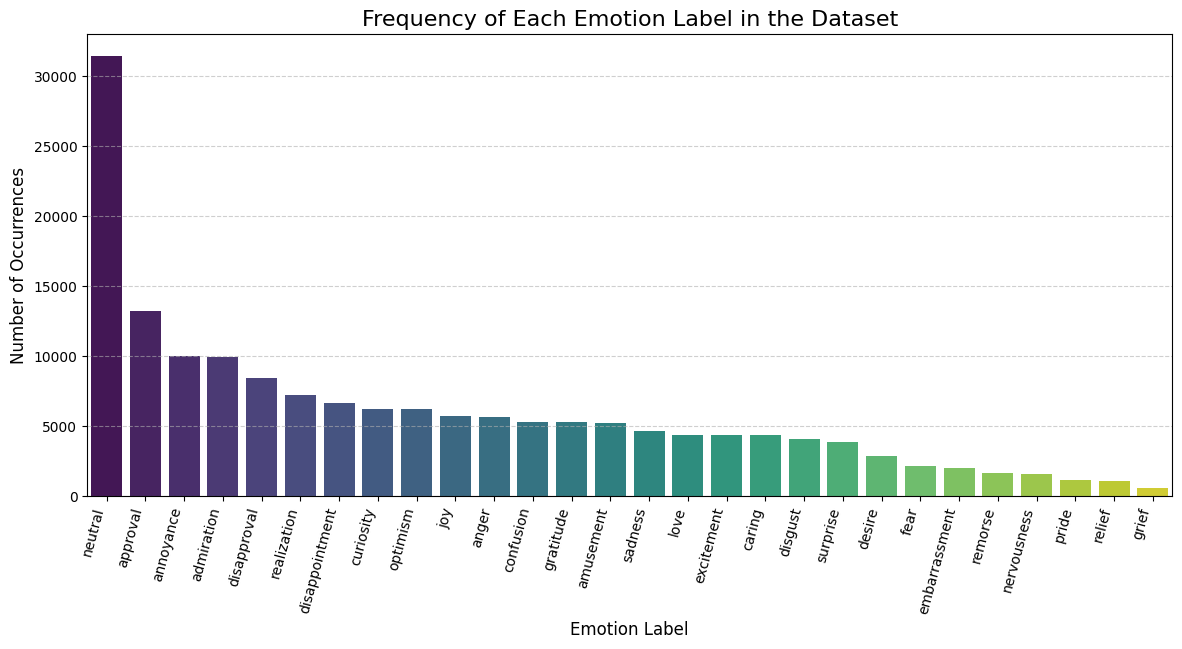

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total occurrences of each emotion label
label_counts = df_final[emotion_columns].sum().sort_values(ascending=False)

# Visualize the distribution
plt.figure(figsize=(14, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")

# Formatting for readability
plt.xticks(rotation=75, ha='right')
plt.title('Frequency of Each Emotion Label in the Dataset', fontsize=16)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Emotion Label', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Summary of Distribution**

**Dominant Labels:** "Neutral" is the most frequent category, followed by sentiments like "Approval and "Annoyance."

**Rare Emotions:** Categories such as "Grief", "Relief", and "Pride" have very few samples.

**Implication:** The dataset is highly imbalanced. During model training, we may need to use techniques like weighted loss functions or oversampling to ensure the model learns the rare emotions effectively.

### **4.2** Analysis of Emotional Co-occurrence
Because many comments in this dataset are multi-label, emotions often appear together. We use a correlation heatmap to identify these "hidden links." By masking the redundant upper triangle and adjusting the scale, we can better visualize which sentiments share a statistical relationship.

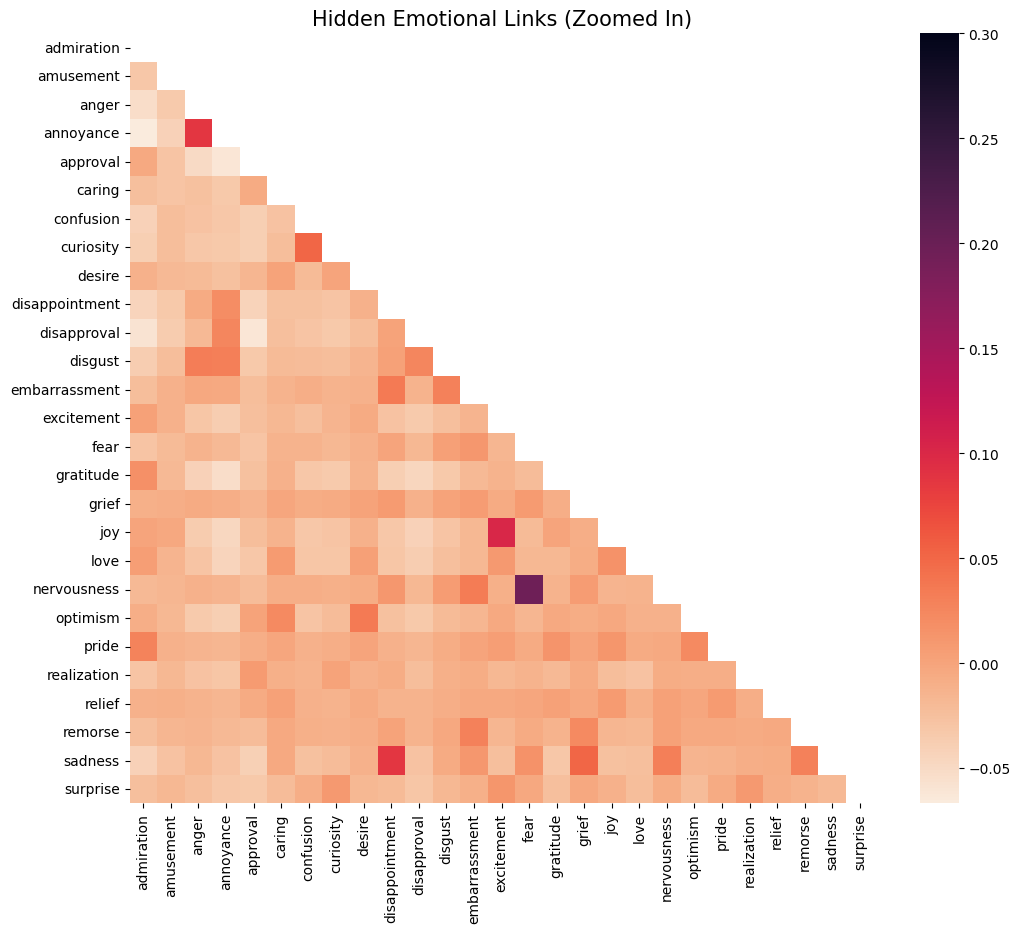

In [ ]:
# Focus only on active emotions for cleaner correlation
emotions_only = df[emotion_columns].drop(columns=['neutral'], errors='ignore')

# Calculate correlation
corr = emotions_only.corr()

# Mask the upper triangle (it's a mirror image, so we hide half to make it cleaner)
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=False, cmap='rocket_r', vmax=0.3)
plt.title('Hidden Emotional Links (Zoomed In)', fontsize=15)
plt.show()

### 4.3 Distribution of Labels per Comment
This visualization reveals the complexity of the dataset by showing how many unique emotions were assigned to each comment after our aggregation step.

/tmp/ipython-input-3355813104.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=label_counts_dist.index, y=label_counts_dist.values, palette="magma")


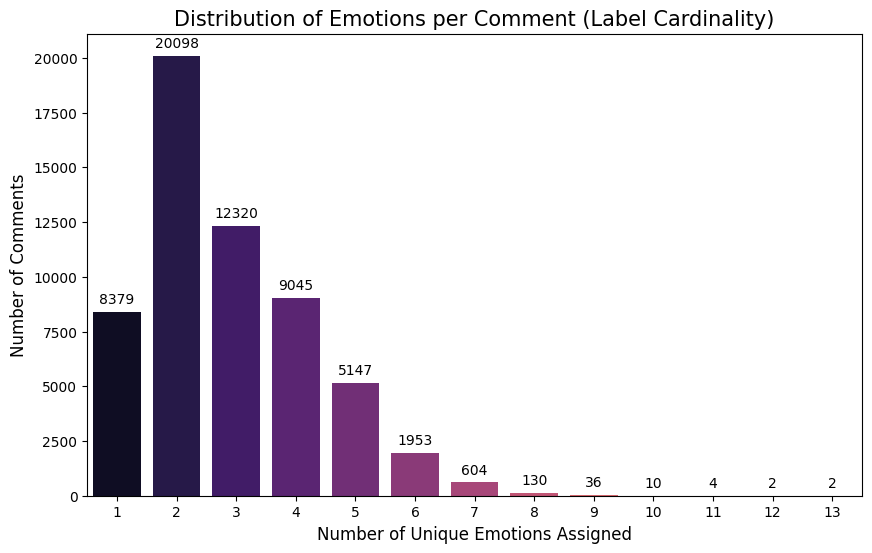

In [ ]:
# Calculate the number of labels for each row in the final dataset
label_counts_dist = df_final['label_count'].value_counts().sort_index()

# Visualize
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=label_counts_dist.index, y=label_counts_dist.values, palette="magma")

# Add labels on top of bars for better clarity
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 9), textcoords = 'offset points')

plt.title('Distribution of Emotions per Comment (Label Cardinality)', fontsize=15)
plt.xlabel('Number of Unique Emotions Assigned', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)
plt.show()

**Interpretation**

**Complexity:** The majority of comments are multi-label, with 2 or 3 emotions being more common than single labels. This highlights the layered nature of Reddit conversations.

**The "Consensus" Effect:** The presence of comments with 4 to 13 labels shows instances where various raters identified a high degree of emotional nuance in a single text.

**Modeling Goal:** This confirms that a "pick-one" classifier is insufficient; the model must be capable of predicting multiple independent probabilities for every input.

### 4.4 Text Length Distribution Analysis
We examine the distribution of word counts across the dataset. Understanding the typical length of comments helps determine the optimal sequence length for our NLP model and identifies potential outliers.

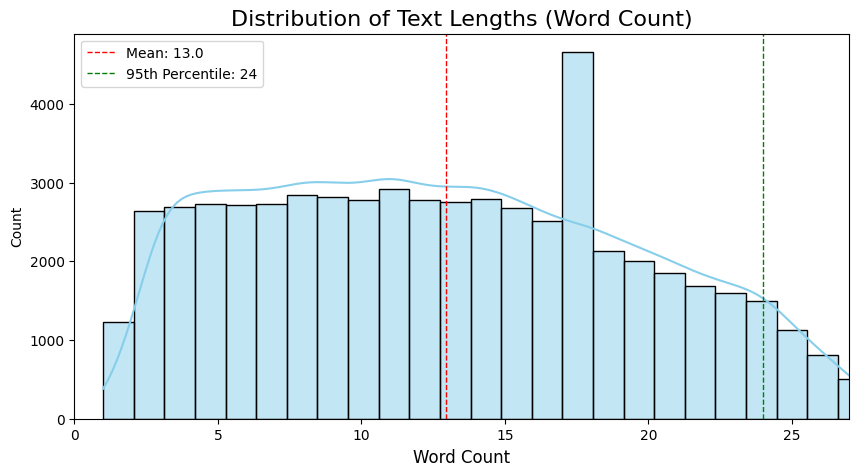


Summary Statistics for Word Count:
count    57730.000000
mean        12.962099
std          6.667604
min          1.000000
25%          7.000000
50%         13.000000
75%         18.000000
max         33.000000
Name: word_count, dtype: float64


In [ ]:
# 1. Calculate word count for the cleaned dataset
df_final['word_count'] = df_final['text'].apply(lambda x: len(str(x).split()))

# 2. Analyze the distribution of text lengths
plt.figure(figsize=(10, 5))
sns.histplot(df_final['word_count'], bins=30, kde=True, color='skyblue')

# Limit the x-axis to the 99th percentile to better visualize the bulk of the data
max_visual_limit = df_final['word_count'].quantile(0.99)
plt.xlim(0, max_visual_limit)

# Add reference lines for Mean and 95th Percentile
plt.axvline(df_final['word_count'].mean(), color='red', linestyle='dashed', linewidth=1,
            label=f'Mean: {df_final["word_count"].mean():.1f}')
plt.axvline(df_final['word_count'].quantile(0.95), color='green', linestyle='dashed', linewidth=1,
            label=f'95th Percentile: {df_final["word_count"].quantile(0.95):.0f}')

plt.title('Distribution of Text Lengths (Word Count)', fontsize=16)
plt.xlabel('Word Count', fontsize=12)
plt.legend()
plt.show()

print("\nSummary Statistics for Word Count:")
print(df_final['word_count'].describe())

### Word Count Analysis ###
This histogram illustrates the Word Count Distribution for all samples in the dataset, which is crucial for preparing the data for the BERT model. The plot shows that the vast majority of texts are short, with the mean word count being 13.0 words. Crucially, the 95th percentile is at 24 words, confirming that a small max_length (e.g., 32 or 64 tokens) is sufficient for tokenization. This ensures we capture nearly all contextual information while maximizing computational efficiency by minimizing unnecessary padding.

### 4.5 Label Density vs. Text Length
We investigate if longer comments tend to have more emotion labels. This helps determine if the "complexity" of a comment is tied to its length or if short comments can be equally nuanced.

/tmp/ipython-input-4152534376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label_count', y='word_count', data=df_final, palette='viridis')


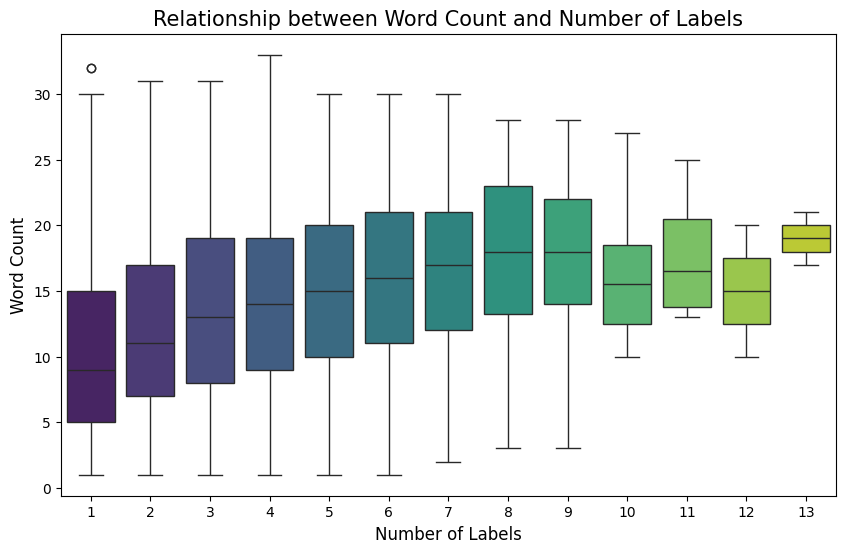

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label_count', y='word_count', data=df_final, palette='viridis')
plt.title('Relationship between Word Count and Number of Labels', fontsize=15)
plt.xlabel('Number of Labels', fontsize=12)
plt.ylabel('Word Count', fontsize=12)
plt.show()

**Interpretation**

**Positive Correlation:** There is a clear upward trend showing that longer comments tend to accumulate more emotion labels as the word count increases.

**High Density:** Even very short comments (under 10 words) frequently contain multiple labels, proving that brevity does not necessarily mean an absence of emotional complexity.

**Modeling Goal:** The data shows that complexity is not purely a function of length; the model must be trained to detect nuanced, overlapping signals in both short snippets and longer sentences.

## 5. Exporting the cleaned dataset

### 5.1 Data Integrity Check
Before exporting, we ensure the dimensions are correct and that our label columns are purely binary.

In [ ]:
# Final check of dataset shape and label types
print(f"Final Dataset Shape: {df_final.shape}")
print(f"Number of unique emotions: {len(emotion_columns)}")

# Verify all emotion columns are integer type (0 or 1)
is_binary = df_final[emotion_columns].isin([0, 1]).all().all()
print(f"Data is purely binary (Multi-label ready): {is_binary}")

# Preview the first few rows
df_final[['text'] + emotion_columns[:5]].head()

Final Dataset Shape: (57730, 31)
Number of unique emotions: 28
Data is purely binary (Multi-label ready): True


,text,admiration,amusement,anger,annoyance,approval
0,"""If you don't wear BROWN AND ORANGE...YOU DON...",0,0,1,1,1
1,"""What do Scottish people look like?"" How I wo...",0,0,0,0,0
2,"### A surprise, to be sure, but a welcome one",0,0,0,0,0
3,"'*Pray*, v. To ask that the laws of the unive...",0,0,0,0,0
4,">it'll get invaded by tankie, unfortunately. ...",0,0,0,0,0


### 5.2 Exporting dataset for Training

In [ ]:
# Save to a CSV for the next stage of the project
df_final.to_csv('/content/drive/MyDrive/goemotions_cleaned.csv', index=False)
print("File permanently saved to your Google Drive as 'goemotions_cleaned.csv'")

File permanently saved to your Google Drive as 'goemotions_cleaned.csv'


### 6. EDA Conclusion & Project Hand-off

**Key Data Insights**

**Aggregation Success:** We successfully compressed the raw rater data into 57,732 unique entries, resolving rater disagreements through a multi-label consensus approach.

**Label Cardinality:** The dataset is naturally complex; most comments contain 2 or 3 distinct emotions, necessitating a multi-label classification architecture (e.g., Sigmoid activation instead of Softmax).

**Class Imbalance:** Significant imbalance exists between dominant labels like "Neutral/Admiration" and rare labels like "Grief/Pride." This will require weighted loss functions in the training phase.

**Sequence Length:** With a mean word count of 13 and a 95th percentile of 24 words, we can optimize our model's performance by setting a maximum sequence length of 32 or 64 tokens.